## Run Policies

In [1]:
from policies import run_experiment

policies = [1, 2, 3]
exp_num = [1, 2, 3, 4]
run_time = 10_000

queue_logs = []

# NOTE: run_experiment returns queue_lengths_over_time, profit_per_customer, frac_over_30s, avg_queue_len

# Run experiments for policies
for i in range(len(policies)): 
    pol_results = []
    for j in range(len(exp_num)): 
        pol_results.append(run_experiment(policies[i], exp_num[j], run_time)[0])
    queue_logs.append(pol_results)


------------------- Policy 1, Results for experiment 1:----------------
Average profit per customer: 39.250512313408336
Fraction of customers waiting over 30s: 0.8642882126617698
ITERS: 45775
Average length of queue 1: 4.682223669864165
Average length of queue 2: 4.606737737633267
Average length of queue 3: 25.19188175191298
------------------- Policy 1, Results for experiment 2:----------------
Average profit per customer: 54.32089928971881
Fraction of customers waiting over 30s: 0.6419439579684764
ITERS: 45709
Average length of queue 1: 2.2462957773225356
Average length of queue 2: 2.2910883975711642
Average length of queue 3: 4.2650018951717295
------------------- Policy 1, Results for experiment 3:----------------
Average profit per customer: 49.86417084015865
Fraction of customers waiting over 30s: 0.6992622342515389
ITERS: 45866
Average length of queue 1: 4.952412622759637
Average length of queue 2: 1.8693177493720163
Average length of queue 3: 4.309270489425813
-----------------

In [2]:
# log0 = queue_logs[0][0]
# print("len(log0) =", len(log0))
# print("first few entries:", log0[:5])


In [3]:
# import matplotlib.pyplot as plt
# from utils import ci_from_queue_logs, plot_queue_lengths

# warmup_time_candidates = [0, 100, 200, 300, 400]

# for w in warmup_time_candidates:
#     res = ci_from_queue_logs(queue_logs, warmup_time=w)
#     print(f"\nWarm-up time = {w}")
#     for pol_idx, pol_res in res.items():
#         print(f"  Policy {policies[pol_idx]}:")
#         for q_name, stats in pol_res.items():
#             print(
#                 f"    {q_name}: mean={stats['mean']:.3f}, "
#                 f"CI={stats['ci']}, "
#                 f"rel_hw={stats['rel_halfwidth']:.3%}"
#             )

# for i in range(len(policies)):
#     for j in range(len(exp_num)):
#         plot_queue_lengths(queue_logs[i][j], warmup_time=0, exp_num=j+1, policy_num=i+1)

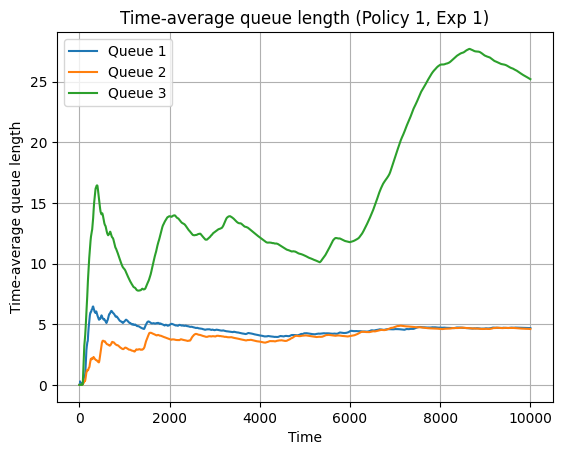

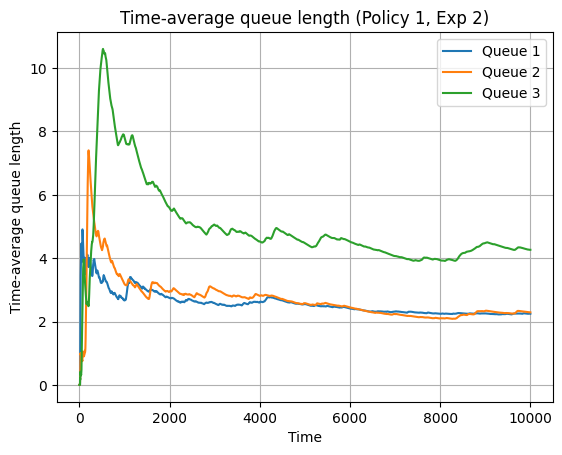

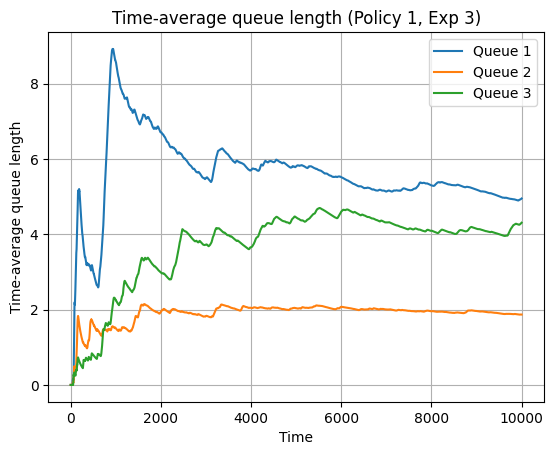

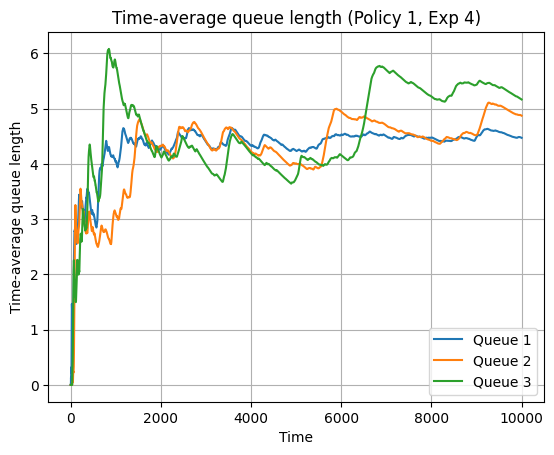

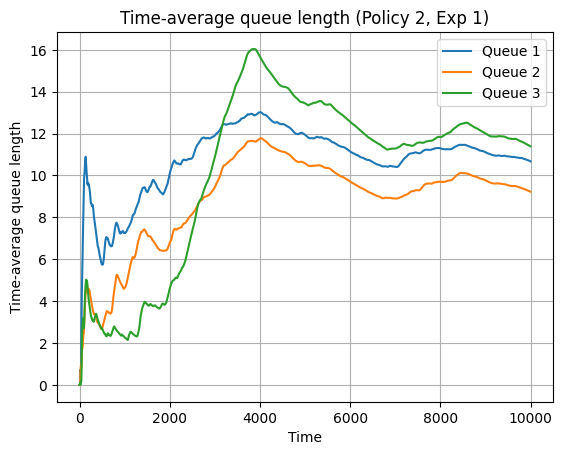

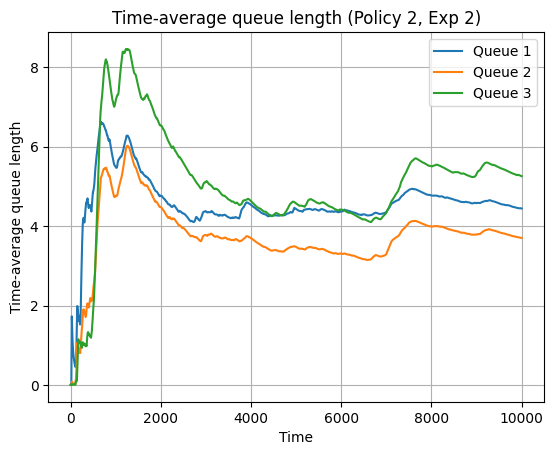

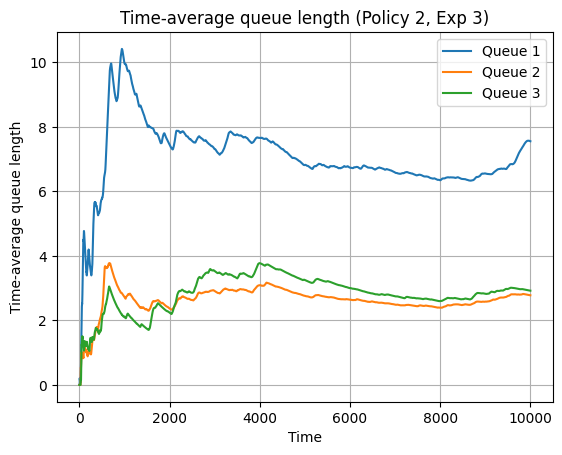

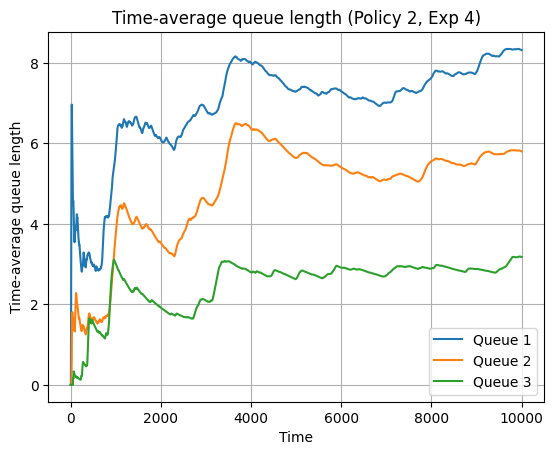

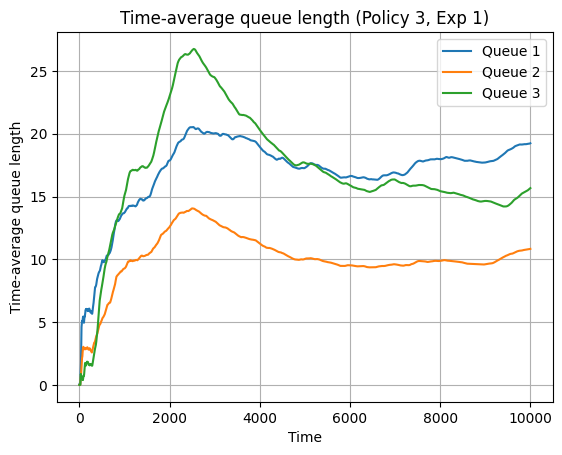

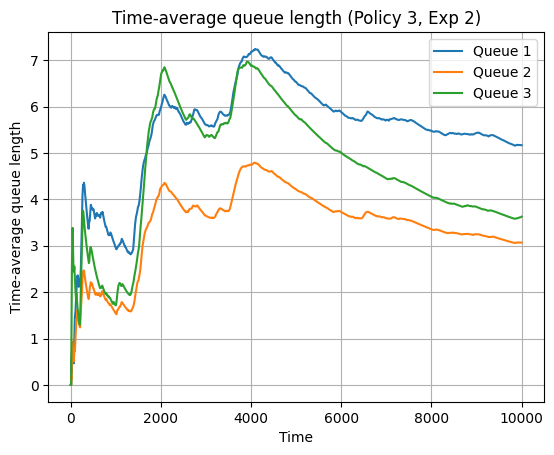

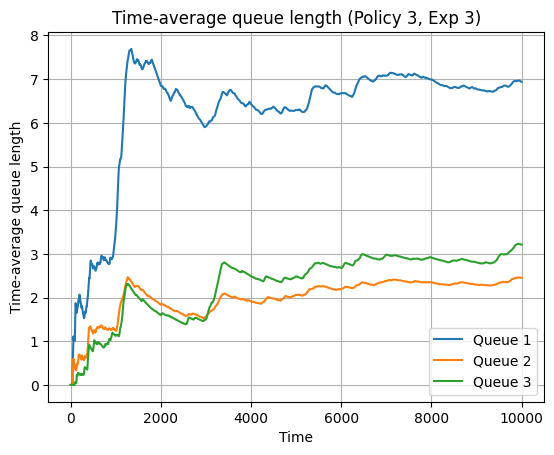

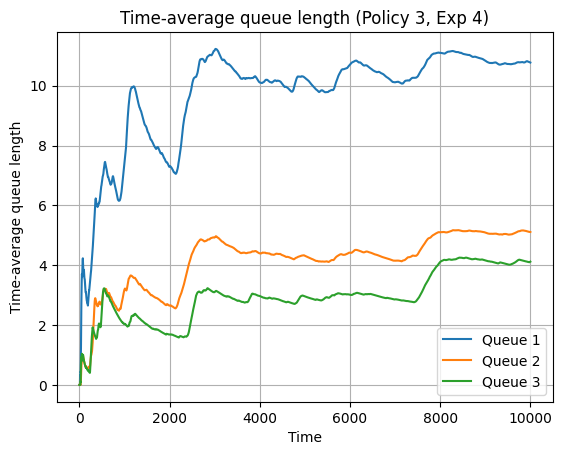

In [4]:
from utils import plot_time_avg_queue

for pol_idx, pol in enumerate(policies):
    for exp_idx, exp in enumerate(exp_num):
        log = queue_logs[pol_idx][exp_idx] 
        plot_time_avg_queue(log, warmup_time=0.0,
                            exp_num=exp, policy_num=pol)


In [ ]:
from policies import run_experiment
import numpy as np

policies   = [1, 2, 3] 
experiments = [1, 2, 3, 4]
run_time = 20_000
n_reps = 40

results = {}

for pol in policies:
    results[pol] = {}
    for exp in experiments:
        queue_logs = []
        profits = []
        fracs_over30 = []
        avg_queues = []

        for r in range(n_reps):
            qlog, profit_per_customer, frac_over_30s, avg_queue_len = run_experiment(
                pol, exp, run_time, 4000
            )
            queue_logs.append(qlog)
            profits.append(profit_per_customer)
            fracs_over30.append(frac_over_30s)
            avg_queues.append(avg_queue_len) 

        results[pol][exp] = {
            "queue_logs": queue_logs,
            "profits": np.array(profits),
            "frac_over_30s": np.array(fracs_over30),
            "avg_queues": np.array(avg_queues), 
        }


------------------- Policy 1, Results for experiment 1:----------------
Average profit per customer: 40.64202513229067
Fraction of customers waiting over 30s: 0.87141689373297
ITERS: 91620
Average length of queue 1: 4.311942799604571
Average length of queue 2: 4.224398900909914
Average length of queue 3: 15.08985768161336
------------------- Policy 1, Results for experiment 1:----------------
Average profit per customer: 31.289562233659858
Fraction of customers waiting over 30s: 0.895300817835839
ITERS: 92157
Average length of queue 1: 4.6239185152659426
Average length of queue 2: 4.991364383578142
Average length of queue 3: 30.096366127302627
------------------- Policy 1, Results for experiment 1:----------------
Average profit per customer: 39.92949810685255
Fraction of customers waiting over 30s: 0.8391640909215241
ITERS: 91668
Average length of queue 1: 5.208923692413152
Average length of queue 2: 4.87063141266523
Average length of queue 3: 11.900840033008913
------------------- Po

In [ ]:
from utils import ci_1d

alpha = 0.05 

for pol in policies:
    for exp in experiments:
        res = results[pol][exp]
        profits = res["profits"]
        fracs_over30 = res["frac_over_30s"]
        avg_queues = res["avg_queues"]

        ci_profit = ci_1d(profits, alpha=alpha)
        ci_frac = ci_1d(fracs_over30, alpha=alpha)
        ci_q1 = ci_1d(avg_queues[:, 0], alpha=alpha)
        ci_q2 = ci_1d(avg_queues[:, 1], alpha=alpha)
        ci_q3 = ci_1d(avg_queues[:, 2], alpha=alpha)

        print(f"\nPolicy {pol}, Experiment {exp}")
        print(f"  Profit per customer:      mean={ci_profit['mean']:.3f}, "
              f"CI={ci_profit['ci']}, rel_hw={ci_profit['rel_halfwidth']:.3%}")
        print(f"  Fraction wait >30s:       mean={ci_frac['mean']:.3f}, "
              f"CI={ci_frac['ci']}, rel_hw={ci_frac['rel_halfwidth']:.3%}")
        print(f"  Avg queue 1 length:       mean={ci_q1['mean']:.3f}, "
              f"CI={ci_q1['ci']}, rel_hw={ci_q1['rel_halfwidth']:.3%}")
        print(f"  Avg queue 2 length:       mean={ci_q2['mean']:.3f}, "
              f"CI={ci_q2['ci']}, rel_hw={ci_q2['rel_halfwidth']:.3%}")
        print(f"  Avg queue 3 length:       mean={ci_q3['mean']:.3f}, "
              f"CI={ci_q3['ci']}, rel_hw={ci_q3['rel_halfwidth']:.3%}")



Policy 1, Experiment 1
  Profit per customer:      mean=36.099, CI=(np.float64(34.12705706205658), np.float64(38.070957812702986)), rel_hw=5.463%
  Fraction wait >30s:       mean=0.868, CI=(np.float64(0.8598945198012085), np.float64(0.8759861949698684)), rel_hw=0.927%
  Avg queue 1 length:       mean=5.485, CI=(np.float64(5.305444127673343), np.float64(5.663779023382056)), rel_hw=3.267%
  Avg queue 2 length:       mean=5.429, CI=(np.float64(5.127100691130526), np.float64(5.729975844689159)), rel_hw=5.553%
  Avg queue 3 length:       mean=28.468, CI=(np.float64(24.424906512905878), np.float64(32.51145452377526)), rel_hw=14.203%

Policy 1, Experiment 2
  Profit per customer:      mean=52.630, CI=(np.float64(52.20980643474023), np.float64(53.0503852313654)), rel_hw=0.799%
  Fraction wait >30s:       mean=0.668, CI=(np.float64(0.6581352523093391), np.float64(0.6787547427647613)), rel_hw=1.542%
  Avg queue 1 length:       mean=2.505, CI=(np.float64(2.440036876912465), np.float64(2.56900739